In [12]:
import pandas as pd
pd.set_option('display.width',4000)
pd.set_option('max_colwidth',4000)
pd.set_option('max_rows',100)
pd.set_option('max_columns',200)

import numpy as np
from pathlib import Path
import sys
import datetime as dt

# import sklearn
# import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sys.path.insert(1,"../") # add dir with helper files

# save and load obj
#from scripts.general_helpers import *


In [13]:

CLEANED = Path("../cleaned")
five_all = pd.read_pickle(CLEANED/"fivethirtyeight_all.xz")

In [14]:
CLEANED = Path("../cleaned")
five_all = pd.read_pickle(CLEANED/"fivethirtyeight_all.xz")
five_all['game_date'] = pd.to_datetime(five_all['game_date'])
five_pre = pd.read_pickle(CLEANED/"fivethirtyeight_pre.xz")

five_pre['game_date'] = pd.to_datetime(five_pre['game_date'])
games = pd.read_pickle(CLEANED/"games_basic_all.xz")
pbp_all = pd.read_pickle(CLEANED/"pbp_all.xz")

pbp_all['game_date'] = pd.to_datetime(pbp_all['game_date'])
#a `timeout` is `play_type` == `no_play`

pbp_pre = pd.read_pickle(CLEANED/"pbp_pre.xz")

pbp_pre['game_date'] = pd.to_datetime(pbp_pre['game_date'])
# can join to games
# has end of game / season info

fastr_all = pd.read_pickle(CLEANED/"fastr_all.xz")

fastr_all['game_date'] = pd.to_datetime(fastr_all['game_date']).dt.date
fastr_all['game_date'] = pd.to_datetime(fastr_all['game_date'])
fastr_pre = pd.read_pickle(CLEANED/"fastr_pre.xz")

fastr_pre['game_date'] = pd.to_datetime(fastr_pre['game_date']).dt.date
fastr_pre['game_date'] = pd.to_datetime(fastr_pre['game_date'])
fastr_standings = pd.read_pickle(CLEANED/"fastr_standings_all.xz")
DATA = Path("../data")
  


In [15]:
team_colors = pd.read_csv(DATA/"teamcolors.csv")
merged_pbp_fastr = pbp_pre.merge(fastr_pre,
                                 how="outer",
                                 left_on=["game_id","home_team","away_team"],#"game_date"],
                                 right_on=["game_id","home_team","away_team"])#,#"game_date"],
                                 #indicator=True)
#
#merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)

#merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
#merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])
#fd_df = merged_pbp_fastr[merged_pbp_fastr["down"]== 4]

In [16]:
merged_pbp_fastr = merged_pbp_fastr.drop(columns=["game_date_x"])

In [9]:
merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])

In [38]:
DATA = Path("../data")
  
team_colors = pd.read_csv(DATA/"teamcolors.csv")

In [39]:
team_colors

,team,color,color2,color3,color4
0,ARI,#97233f,#000000,#ffb612,#a5acaf
1,ARZ,#97233f,#000000,#ffb612,#a5acaf
2,ATL,#a71930,#000000,#a5acaf,#a30d2d
3,BAL,#241773,#000000,#9e7c0c,#c60c30
4,BLT,#241773,#000000,#9e7c0c,#c60c30
5,BUF,#00338d,#c60c30,#0c2e82,#d50a0a
6,CAR,#0085ca,#000000,#bfc0bf,#0085ca
7,CHI,#0b162a,#c83803,#0b162a,#c83803
8,CIN,#000000,#fb4f14,#000000,#d32f1e
9,CLE,#fb4f14,#22150c,#a5acaf,#d32f1e


In [26]:
merged_pbp_fastr = pbp_pre.merge(fastr_pre,
                                 how="outer",
                                 left_on=["game_id","home_team","away_team"],#"game_date"],
                                 right_on=["game_id","home_team","away_team"])#,#"game_date"],
                                 #indicator=True)
merged_pbp_fastr = merged_pbp_fastr.drop(columns=["game_date_x"])
merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)

merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])


In [8]:
#merged_pbp_fastr 
from pathlib import Path  
filepath = Path('..data/data_team.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
merged_pbp_fastr.to_csv(filepath) 

In [27]:
merged_pbp_fastr.columns

Index(['game_id', 'play_id', 'play_type', 'home_team', 'away_team', 'posteam', 'defteam', 'game_half', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'ydstogo', 'ydsnet', 'yardline_100', 'side_of_field', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob', 'td_prob', 'extra_point_prob', 'two_point_conversion_prob', 'old_game_id', 'season', 'game_type', 'week', 'game_date', 'weekday', 'gametime', 'location', 'away_rest', 'home_rest', 'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds', 'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game', 'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee', 'stadium_id', 'stadium'], dtype='object')

In [28]:

fd_df = merged_pbp_fastr[merged_pbp_fastr["down"]== 4]



In [18]:
teams = list(fd_df["home_team"].unique())
teams.sort()


In [19]:
fd_df['away_team'].unique()

array(['TEN', 'MIA', 'KC', 'PHI', 'DEN', 'MIN', 'NYJ', 'JAX', 'DET',
       'DAL', 'SF', 'WAS', 'LAR', 'CHI', 'BUF', 'LAC', 'CAR', 'CIN',
       'ARI', 'OAK', 'NE', 'NO', 'HOU', 'TB', 'SEA', 'PIT', 'CLE', 'BAL',
       'NYG', 'IND', 'ATL', 'GB'], dtype=object)

In [20]:
atl = fd_df[fd_df["home_team"]== 'ATL']

In [21]:
a = team_colors[team_colors['team']=='ATL']
b = a['color'].astype(str)
score_pos = '<p style="font-family:sans-serif; color:' + b + '; font-size: 60px;">'+b+' </p>'
score_pos

2    <p style="font-family:sans-serif; color:#a71930; font-size: 60px;">#a71930 </p>
Name: color, dtype: object

In [33]:
a = atl['posteam_score'].astype(str)
' '.join(a)


'0.0 0.0 0.0 0.0 7.0 7.0 0.0 10.0 0.0 10.0 16.0 0.0 16.0 0.0 0.0 0.0 3.0 3.0 10.0 21.0 21.0 28.0 20.0 28.0 0.0 0.0 0.0 0.0 0.0 7.0 7.0 7.0 14.0 14.0 14.0 14.0 0.0 0.0 7.0 0.0 13.0 0.0 3.0 20.0 3.0 23.0 17.0 30.0 17.0 0.0 0.0 0.0 0.0 0.0 10.0 7.0 7.0 10.0 10.0 10.0 17.0 17.0 13.0 17.0 13.0 17.0 13.0 13.0 17.0 13.0 0.0 0.0 0.0 10.0 0.0 10.0 0.0 10.0 0.0 13.0 0.0 0.0 13.0 0.0 0.0 0.0 33.0 nan 33.0 0.0 0.0 3.0 6.0 6.0 23.0 23.0 26.0 23.0 0.0 0.0 7.0 0.0 7.0 0.0 10.0 10.0 0.0 10.0 0.0 10.0 0.0 23.0 3.0 23.0 30.0 0.0 7.0 7.0 7.0 7.0 7.0 7.0 31.0 31.0 7.0 34.0 7.0 41.0 0.0 0.0 0.0 13.0 13.0 7.0 7.0 7.0 10.0 13.0 13.0 13.0 13.0 13.0 0.0 7.0 0.0 7.0 3.0 3.0 17.0 3.0 24.0 nan 39.0 0.0 0.0 14.0 17.0 14.0 14.0 24.0 nan 27.0 27.0 21.0 0.0 0.0 0.0 0.0 0.0 7.0 7.0 10.0 13.0 7.0 20.0 20.0 0.0 0.0 3.0 0.0 3.0 3.0 3.0 10.0 10.0 10.0 17.0 10.0 10.0 10.0 17.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 10.0 7.0 10.0 10.0 7.0 10.0 7.0 13.0 13.0 0.0 0.0 0.0 13.0 13.0 0.0 13.0 0.0 0.0 20.0 3.0 30.0 3.0 30.0 3.0 30.0 0.0 0.0

In [29]:
fd_df.columns

Index(['game_id', 'play_id', 'play_type', 'home_team', 'away_team', 'posteam', 'defteam', 'game_half', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'ydstogo', 'ydsnet', 'yardline_100', 'side_of_field', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob', 'td_prob', 'extra_point_prob', 'two_point_conversion_prob', 'old_game_id', 'season', 'game_type', 'week', 'game_date', 'weekday', 'gametime', 'location', 'away_rest', 'home_rest', 'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds', 'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game', 'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee', 'stadium_id', 'stadium'], dtype='object')

In [30]:

keep_columns = ['game_id','season','home_team','away_team','down','game_date','game_half','game_seconds_remaining', 'play_type', 'ydstogo','yardline_100', 'posteam', 'qtr','side_of_field', 'defteam', 'side_of_field','posteam_score','defteam_score','roof','surface','temp','wind','stadium']

In [31]:
small_data=fd_df[keep_columns].head(100000)
from pathlib import Path  
filepath = Path('data/small_data_team.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
small_data.to_csv(filepath) 

In [32]:
pbp_all_test = pbp_all.head(10000)
from pathlib import Path
filepath = Path('data/all_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
pbp_all_test.to_csv(filepath)


In [62]:
team_df = pbp_all_test[pbp_all_test["home_team"]=='ATL']
team_df
away_df = team_df[team_df["away_team"]=='MIA']
away_df
game_df = away_df[away_df["game_date"]=='2009-09-13']
game_df
game_id = list(away_df['game_id'].unique().astype(str))
game_id
#game_id = '2009091300'
new_df = pbp_all_test['game_id']== game_id[0]#'2009091300'


In [70]:
team1 = list(game_df['home_team'].unique())
team2 = list(game_df['away_team'].unique())
game_teams = [team1[0],team2[0]]
game_teams

['ATL', 'MIA']

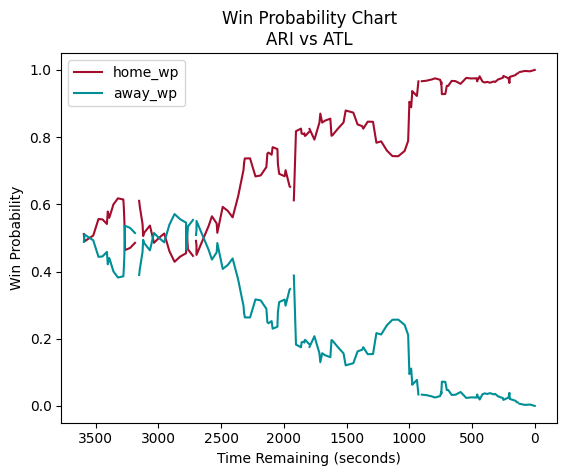

In [72]:
cols_graphic = ['home_wp','away_wp','game_seconds_remaining']
colors = []
for t in game_teams:
    colors.append(team_colors[team_colors["team"]==t]['color4'].tolist()[0])
graph_data = game_df[cols_graphic].set_index("game_seconds_remaining").sort_index(ascending=False)
graph_data.plot(color=colors)
plt.xlabel("Time Remaining (seconds)")
plt.ylabel("Win Probability")
plt.title(f"Win Probability Chart\n{teams[0]} vs {teams[1]}")
plt.gca().invert_xaxis()

<AxesSubplot:xlabel='game_seconds_remaining'>

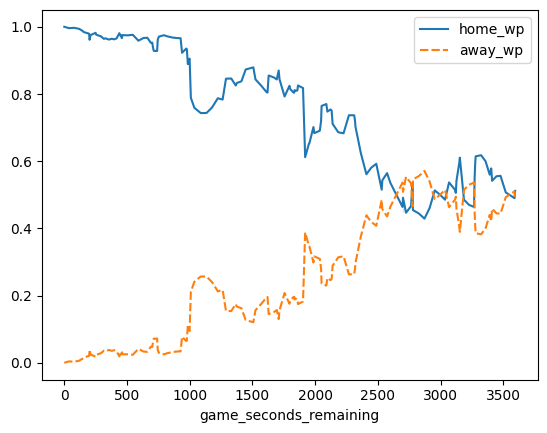

In [83]:
sns.lineplot(data=graph_data)

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [78]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        # plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
        #          color='yellow')
    return fig, ax

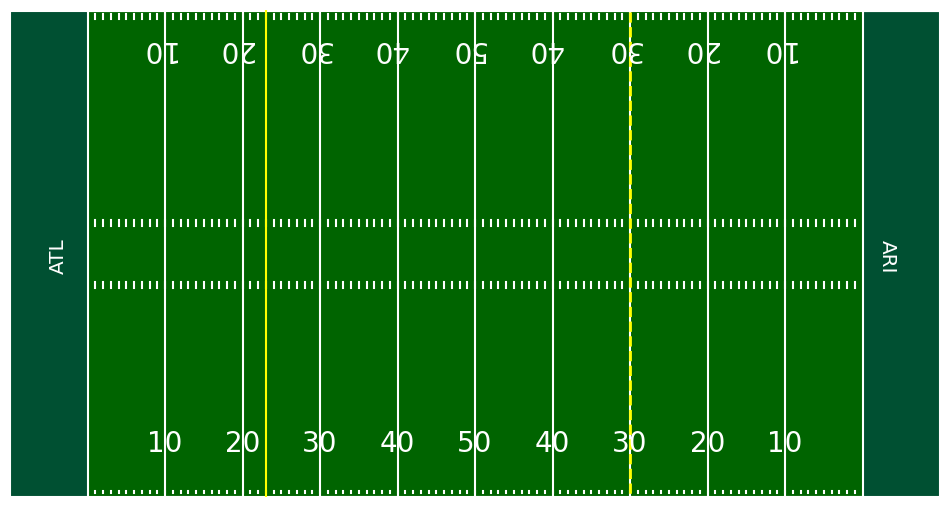

In [81]:
yl=23
fig, ax = create_football_field(highlight_line=True,
                                highlight_line_number=yl)

plt.xlim(0, 120)
plt.ylim(0, 53.5)
plt.vlines(x=80,
           ymin=-5,
           ymax=58.3,
           colors=["yellow","yellow"],
           linestyles="dashed",
           linewidth=2)#"dashed"

plt.text(5, 25, teams[1],
         size="x-large", 
         rotation=90,
         color="white")

plt.text(112, 25, teams[0],
         size="x-large", 
         rotation=270,
         color="white")

#im = plt.imread('../images/100px-Dallas_Cowboys.svg.png', format="png") # insert local path of the image.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_anchor.html#matplotlib.axes.Axes.set_anchor
#                  [left, bottom, width, height]
# newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='E')#, zorder=-1)
#newax = fig.add_axes([0.56, 0.4, 0.2, 0.2], anchor='E')#, zorder=-1)
#newax.imshow(im)
#newax.axis('off')

#im = plt.imread('../images/100px-Houston_Texans_logo.svg.png', format="png") # insert local path of the image.
#newax = fig.add_axes([0.25, 0.4, 0.2, 0.2], anchor='W')#, zorder=-1)
#newax.imshow(im)
#newax.axis('off')

plt.show()